## Arewa Data Science Academy
### Deep Learning Cohort2.0

#### Name: Hassan Muhammad Adam
#### Email: hassanmuhammadadam1@gmail.com
#### Title: Week 3 Solution

### Exercises Solution

In [4]:
# Q1. Make a binary classification dataset with Scikit-Learn's make_moons() function.

from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt


NUM_SAMPLES = 1000
RANDOM_SEED = 42

X, y = make_moons(n_samples=NUM_SAMPLES,
                  noise=0.07,
                  random_state=RANDOM_SEED)

X[:8], y[:8]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483],
        [ 0.59906425, -0.28977331],
        [ 0.29009023, -0.2046885 ],
        [-0.03826868,  0.45942924]]),
 array([1, 1, 1, 1, 0, 1, 1, 1]))

In [5]:
df = pd.DataFrame({"X0": X[:, 0],
                        "X1": X[:, 1],
                        "y": y})
df.head()

,X0,X1,y
0,-0.033411,0.421391,1
1,0.998827,-0.442890,1
2,0.889592,-0.327843,1
3,0.341958,-0.417690,1
4,-0.838531,0.532375,0


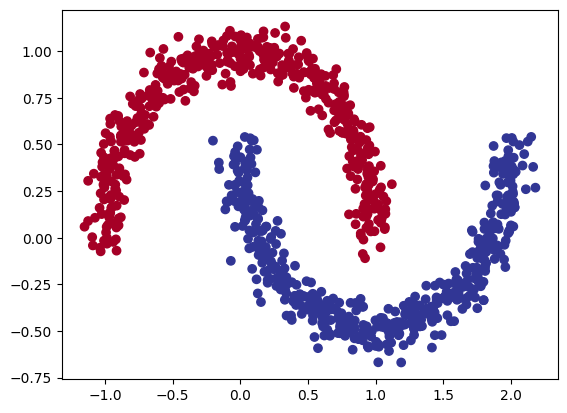

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [7]:
import torch
from sklearn.model_selection import train_test_split

In [8]:
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

In [9]:
# Q2. Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.

from torch import nn

class MoonModelV0(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()

        self.layer1 = nn.Linear(in_features=in_features,
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units,
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

moon_model = MoonModelV0(in_features=2,out_features=1,hidden_units=8)
moon_model

MoonModelV0(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [14]:
moon_model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.0504,  0.5664],
                      [ 0.4597,  0.4897],
                      [ 0.5990, -0.0885],
                      [ 0.5666, -0.2142],
                      [-0.2161,  0.6414],
                      [ 0.5544,  0.3809],
                      [ 0.4155,  0.1010],
                      [ 0.4795,  0.7038]])),
             ('layer1.bias',
              tensor([ 0.4612, -0.1791, -0.5270, -0.4508, -0.4899, -0.3564, -0.0412,  0.1908])),
             ('layer2.weight',
              tensor([[ 1.1046e-01, -1.1949e-02,  3.3207e-01, -1.8444e-01,  5.9641e-02,
                       -1.4596e-01, -1.1825e-01,  1.4380e-02],
                      [ 2.6538e-02, -7.7720e-02,  1.6124e-02, -3.5289e-01, -1.8089e-01,
                       -1.9826e-01, -1.5435e-01, -6.6661e-02],
                      [ 2.3081e-01, -2.7630e-01, -2.7136e-01, -2.9704e-01,  1.0843e-01,
                        9.6605e-02, -1.8973e-01, -2.4985e-01],
                    

In [15]:
# Q3 Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

loss_function = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=moon_model.parameters(),lr=0.1)



In [11]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [19]:
# Q4 Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
from torchmetrics import Accuracy

accuracy_function = Accuracy(task="multiclass", num_classes=2)
accuracy_function

MulticlassAccuracy()

In [23]:
torch.manual_seed(RANDOM_SEED)

epochs = 1000
for epoch in range(epochs):

  moon_model.train()

  y_logits = moon_model(X_train).squeeze()
  y_pred_probs = torch.sigmoid(y_logits)
  y_pred = torch.round(y_pred_probs)

  loss = loss_function(y_logits, y_train)
  acc = accuracy_function(y_pred, y_train.int())

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  # test
  moon_model.eval()

  with torch.inference_mode():
    # Make predictions
    test_logits = moon_model(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # Calculate loss
    test_loss = loss_function(test_logits, y_test)
    # Calculate accuracy
    test_acc = accuracy_function(test_pred, y_test.int())

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} \t Loss: {loss:.2f} Acc: {acc:.2f} \t Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.45
Epoch: 100 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.40
Epoch: 200 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.45
Epoch: 300 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.40
Epoch: 400 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.40
Epoch: 500 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.45
Epoch: 600 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.45
Epoch: 700 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.45
Epoch: 800 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.45
Epoch: 900 	 Loss: 0.65 Acc: 0.64 	 Test loss: 0.77 Test acc: 0.45


In [24]:
# Q5. Make predictions with your trained model and plot them using the plot_decision_boundary() function created in this notebook.


def plot_decision_boundary(model, X, y):

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = torch.meshgrid(torch.linspace(x_min, x_max, 100),
                            torch.linspace(y_min, y_max, 100))


    # Create X value (we're going to make predictions on these)
    x_in = torch.stack([xx.ravel(), yy.ravel()], axis=1)

    # Make predictions
    y_pred = model(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = torch.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation")
        y_pred = torch.round(torch.sigmoid(y_pred)).reshape(xx.shape)


    # modified y_pred to work with numpy arrays

    plt.contourf(xx, yy, y_pred.detach().numpy(), cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

/usr/local/lib/python3.11/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


doing binary classifcation
doing binary classifcation


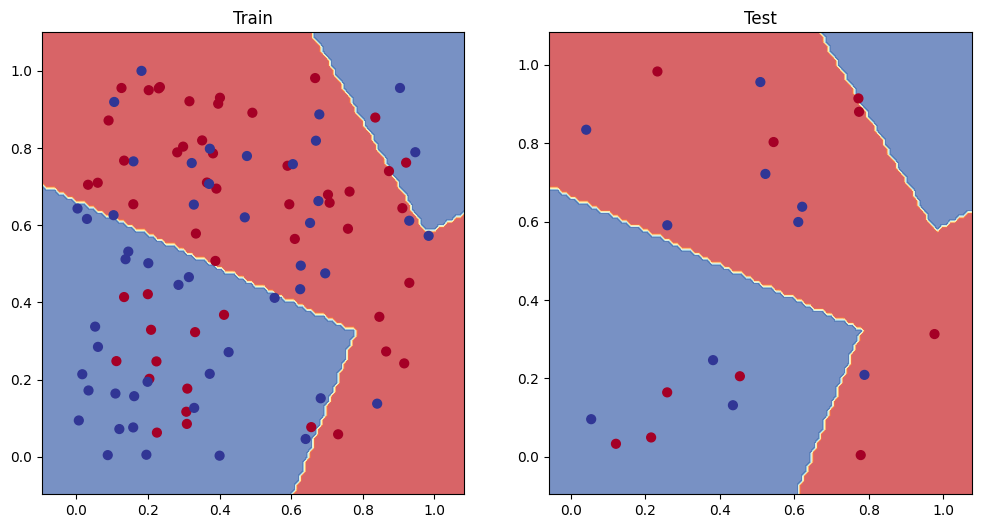

In [25]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moon_model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moon_model, X=X_test, y=y_test)
plt.show()


In [26]:
# Q6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.

def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

In [27]:
A = torch.arange(-100, 100, 1)

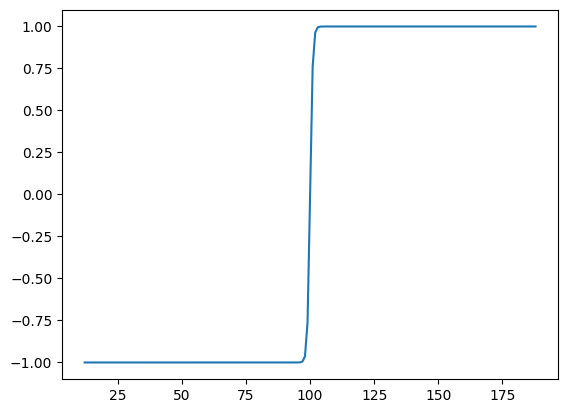

In [28]:
plt.plot(tanh(A))

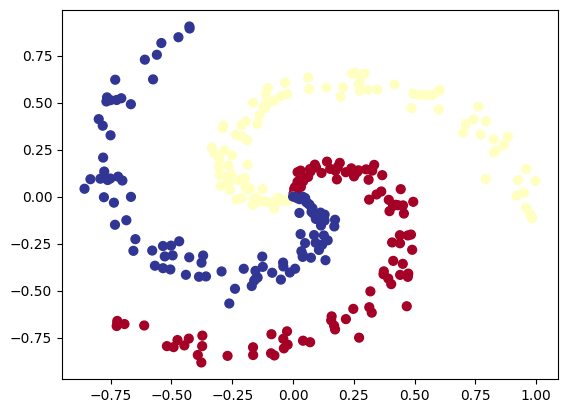

In [29]:
# Q7. Create a multi-class dataset using the spirals data creation function from CS231n (see below for the code).

import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [30]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)

# train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)


(240, 60, 240, 60)

In [31]:
accuracy_function = Accuracy(task="multiclass", num_classes=3)
accuracy_function

MulticlassAccuracy()

In [34]:
class SpiralModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()

        self.layer1 = nn.Linear(in_features=in_features,
                                 out_features=hidden_units)
        self.layer2 = nn.Linear(in_features=hidden_units,
                                 out_features=hidden_units)
        self.layer3 = nn.Linear(in_features=hidden_units,
                                out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

spiral_model = SpiralModel(in_features=2,out_features=3,hidden_units=8)
spiral_model

SpiralModel(
  (layer1): Linear(in_features=2, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=3, bias=True)
  (relu): ReLU()
)

In [35]:
print(spiral_model.state_dict())

OrderedDict([('layer1.weight', tensor([[-0.1807, -0.4035],
        [-0.2421, -0.5283],
        [ 0.2522,  0.5473],
        [-0.6657,  0.1642],
        [ 0.3653,  0.1282],
        [-0.2518,  0.3691],
        [ 0.3716,  0.2644],
        [-0.1243, -0.1872]])), ('layer1.bias', tensor([ 0.0756, -0.1249, -0.2107,  0.4520,  0.6077, -0.0700, -0.1583,  0.0103])), ('layer2.weight', tensor([[-0.0211,  0.0850,  0.0991, -0.3211, -0.1305,  0.2977,  0.1377, -0.0176],
        [-0.2132, -0.2163, -0.3167, -0.1152,  0.1194,  0.2254,  0.1632, -0.3125],
        [-0.2126, -0.0558,  0.3420,  0.0511, -0.0916,  0.1463, -0.1347, -0.2288],
        [ 0.2581, -0.1608, -0.0709, -0.3517,  0.2366,  0.2679,  0.1289, -0.2465],
        [-0.3489, -0.2871,  0.2636,  0.1697,  0.2975,  0.1852,  0.0895, -0.0035],
        [-0.2689, -0.3029, -0.3307,  0.1447, -0.1736, -0.0712, -0.2035, -0.0644],
        [-0.2488, -0.2310,  0.1173, -0.1051,  0.2183, -0.1134, -0.2594, -0.0624],
        [-0.1714, -0.1082, -0.3366,  0.1978, -0.246

In [36]:
loss_function = nn.CrossEntropyLoss()          # loss function
optimizer = torch.optim.Adam(params=spiral_model.parameters(),lr=0.1) # optimizer

In [37]:
torch.manual_seed(RANDOM_SEED)
epochs = 1000
for epoch in range(epochs):

  spiral_model.train()

  y_logits = spiral_model(X_train)
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_pred = torch.argmax(y_pred_probs, dim=1)

  loss = loss_function(y_logits, y_train)
  acc = accuracy_function(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()

  # test
  spiral_model.eval()

  with torch.inference_mode():
    # Make predictions
    test_logits = spiral_model(X_test)
    test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

    # Calculate loss
    test_loss = loss_function(test_logits, y_test)
    # Calculate accuracy
    test_acc = accuracy_function(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} \t Loss: {loss:.2f} Acc: {acc:.2f} \t Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")


Epoch: 0 	 Loss: 1.11 Acc: 0.35 	 Test loss: 1.11 Test acc: 0.27
Epoch: 100 	 Loss: 0.04 Acc: 0.98 	 Test loss: 0.02 Test acc: 1.00
Epoch: 200 	 Loss: 0.03 Acc: 0.99 	 Test loss: 0.01 Test acc: 1.00
Epoch: 300 	 Loss: 0.02 Acc: 0.99 	 Test loss: 0.01 Test acc: 1.00
Epoch: 400 	 Loss: 0.02 Acc: 0.99 	 Test loss: 0.01 Test acc: 1.00
Epoch: 500 	 Loss: 0.13 Acc: 0.95 	 Test loss: 0.09 Test acc: 0.95
Epoch: 600 	 Loss: 0.05 Acc: 0.98 	 Test loss: 0.05 Test acc: 0.98
Epoch: 700 	 Loss: 0.05 Acc: 0.98 	 Test loss: 0.08 Test acc: 0.98
Epoch: 800 	 Loss: 0.05 Acc: 0.98 	 Test loss: 0.03 Test acc: 0.98
Epoch: 900 	 Loss: 0.05 Acc: 0.98 	 Test loss: 0.02 Test acc: 0.98


doing multiclass classification
doing multiclass classification


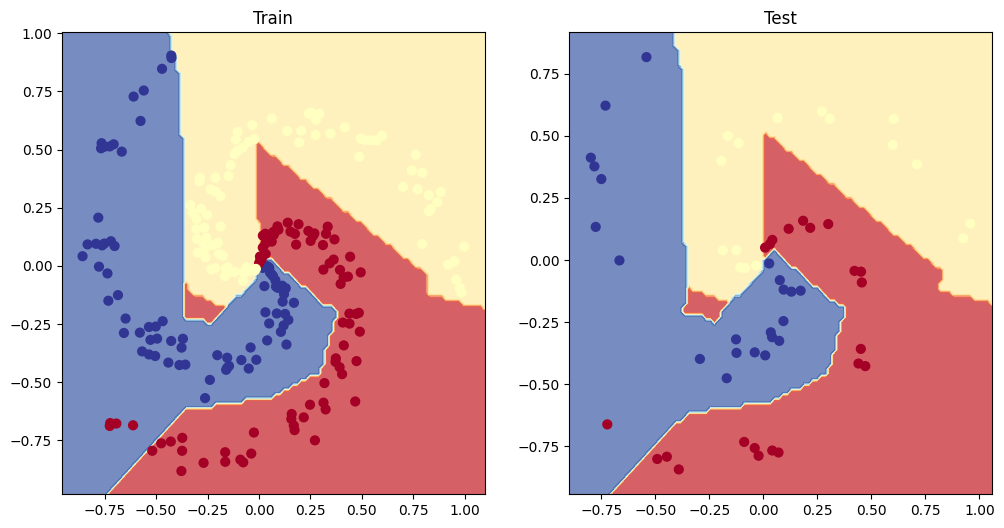

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(spiral_model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")

plot_decision_boundary(spiral_model, X=X_test, y=y_test)
plt.show()
